In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import janitor

In [10]:
%matplotlib inline

In [19]:
sns.set_style("whitegrid")

In [20]:
df = pd.read_csv("../datasets/Ecommerce Customers.csv")

In [21]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [23]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [24]:
df = df.clean_names()

In [25]:
df.columns

Index(['email', 'address', 'avatar', 'avg_session_length', 'time_on_app',
       'time_on_website', 'length_of_membership', 'yearly_amount_spent'],
      dtype='object')

In [26]:
df.isna()

,email,address,avatar,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [27]:
df.isna().sum()

email                   0
address                 0
avatar                  0
avg_session_length      0
time_on_app             0
time_on_website         0
length_of_membership    0
yearly_amount_spent     0
dtype: int64

In [84]:
df.nunique()

email                   500
address                 500
avatar                  138
avg_session_length      500
time_on_app             500
time_on_website         500
length_of_membership    500
yearly_amount_spent     500
dtype: int64

In [28]:
df.describe()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [29]:
df.shape

(500, 8)

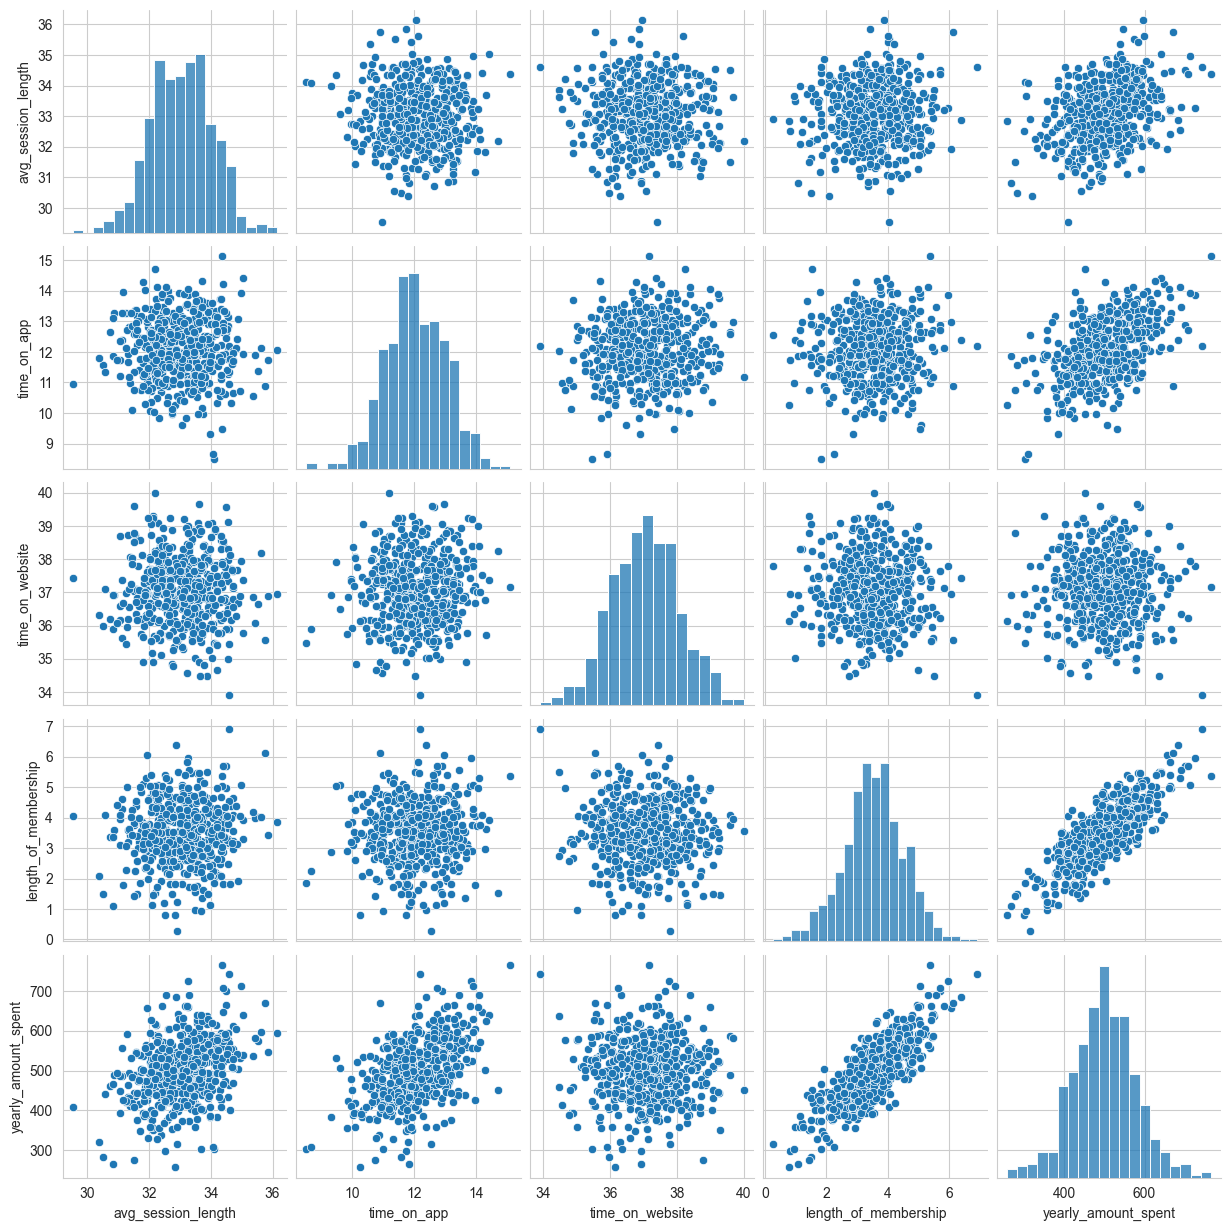

In [30]:
sns.pairplot(data=df)

In [44]:
corr_matrix = df.iloc[:,3:].corr()

<Axes: >

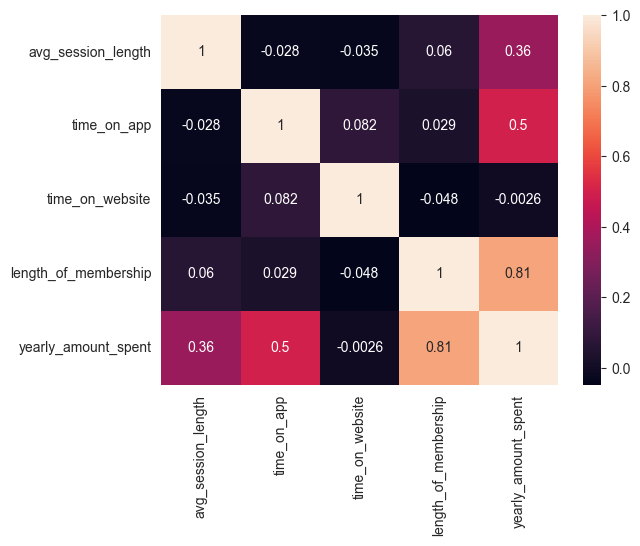

In [48]:
sns.heatmap(data=corr_matrix, annot=True)

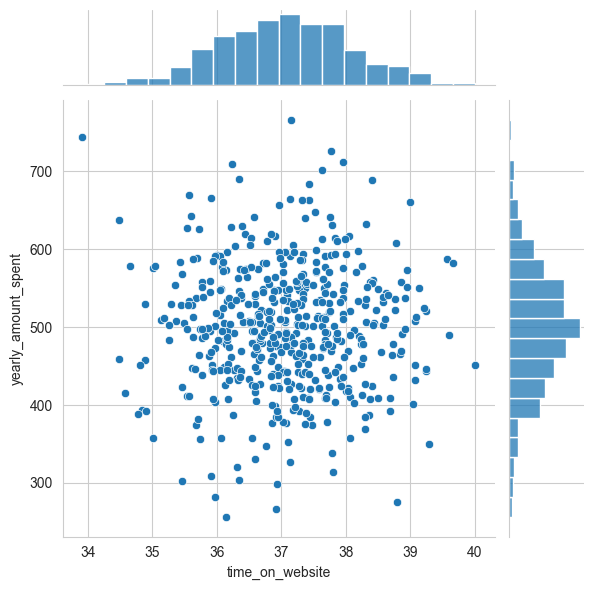

In [49]:
sns.jointplot(data=df, x="time_on_website", y="yearly_amount_spent")

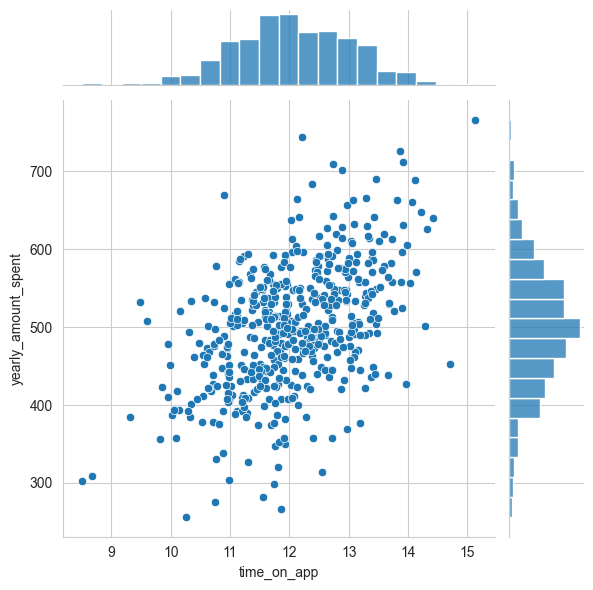

In [51]:
sns.jointplot(data=df, x="time_on_app", y="yearly_amount_spent")

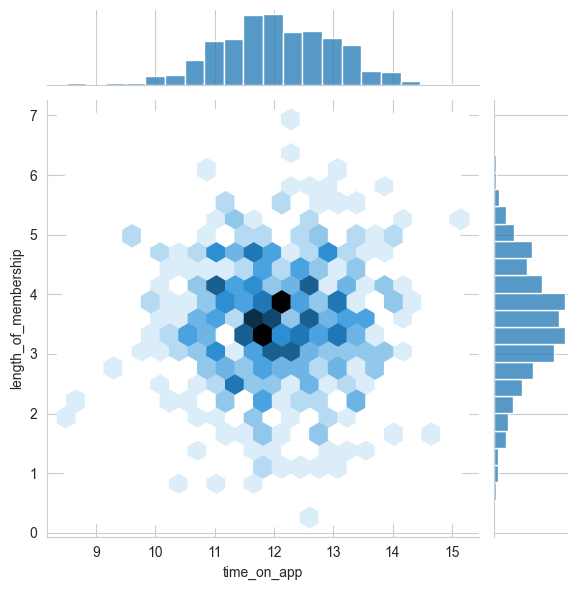

In [54]:
sns.jointplot(x='time_on_app',y='length_of_membership',data=df,kind='hex')

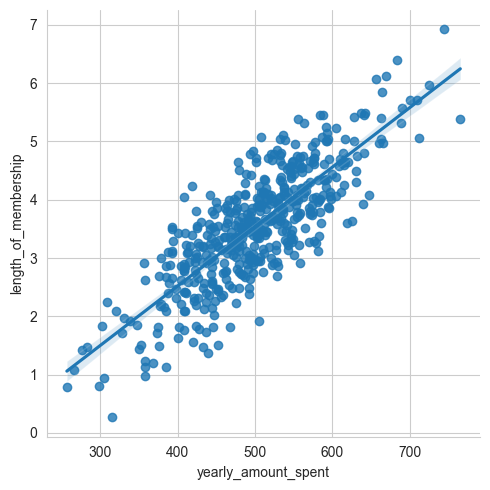

In [55]:
sns.lmplot(data=df, x='yearly_amount_spent', y='length_of_membership')

### splitting data into training and testing

In [59]:
X = df.iloc[:,3:-1]

In [60]:
X

,avg_session_length,time_on_app,time_on_website,length_of_membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [61]:
y=df["yearly_amount_spent"]

In [62]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: yearly_amount_spent, Length: 500, dtype: float64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train,y_train)

LinearRegression()

In [67]:
lm.coef_

array([25.19773697, 38.72875147, -0.18193055, 61.50565074])

In [68]:
lm.intercept_

-1011.068724797188

In [70]:
pd.DataFrame(lm.coef_, X_train.columns,columns=['Coeff'])

,Coeff
avg_session_length,25.197737
time_on_app,38.728751
time_on_website,-0.181931
length_of_membership,61.505651


### making the predictions

In [71]:
predictions = lm.predict(X_test)

In [72]:
predictions

array([456.22007896, 402.11563034, 409.63771314, 590.97449443,
       590.54349558, 548.30924489, 578.79099677, 713.84640776,
       472.41033628, 546.09970776, 337.57467839, 499.43689191,
       552.68969026, 409.05311263, 764.92667606, 546.32227605,
       692.73814285, 507.18044654, 572.63788545, 573.81180325,
       399.66906342, 554.40068726, 455.93523955, 482.8054825 ,
       559.79475347, 411.75022407, 531.95412859, 376.85865816,
       535.19405114, 447.23231386, 595.85350081, 665.51744769,
       510.61834435, 572.44834921, 504.36750345, 564.01621391,
       460.05404737, 449.83089127, 422.11567952, 456.79060068,
       598.13539006, 449.23359186, 614.90546331, 512.30515178,
       502.73920993, 516.52346905, 568.41539017, 551.22019116,
       356.80712822, 465.93672545, 481.29623577, 533.34098144,
       255.5554645 , 504.98821723, 518.89471051, 313.70498054,
       501.53990495, 386.04749966, 472.81634642, 432.28440384,
       539.67425248, 589.53122613, 753.24438401, 559.54

In [73]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
373    430.588883
492    403.819520
485    515.502480
180    517.165136
280    511.979860
Name: yearly_amount_spent, Length: 350, dtype: float64

Text(0, 0.5, 'Predicted Values')

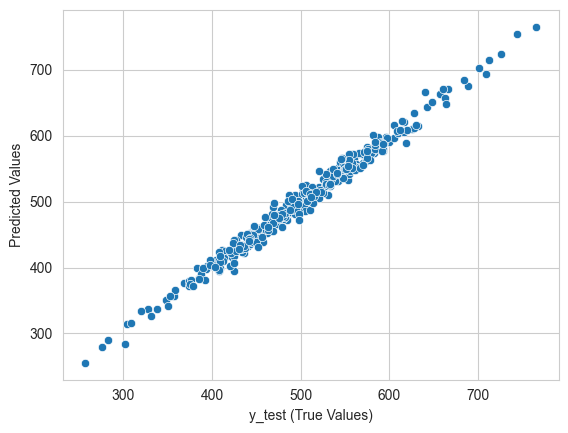

In [88]:
sns.scatterplot(x = y_test, y=predictions)
plt.xlabel('y_test (True Values)')
plt.ylabel('Predicted Values')

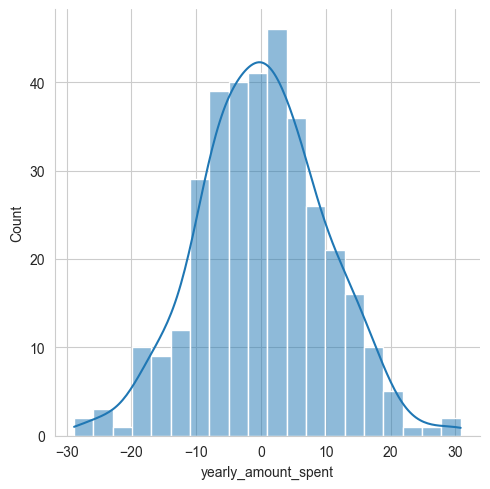

In [83]:
sns.displot((y_test-predictions), kde=True, bins=20)

In [78]:
from sklearn import metrics

In [87]:
print(f'MAE: {metrics.mean_absolute_error(y_test,predictions)}')
print(f'MSE : {metrics.mean_squared_error(y_test,predictions)}')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r-squared:', metrics.explained_variance_score(y_test, predictions))

MAE: 7.64689711362161
MSE : 93.97077001587999
RMSE: 9.693852176296067
r-squared: 0.9858959150016232
